In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('./iphone_purchase_records.csv')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [55]:
df.isnull().sum()

Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64

In [56]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

<Axes: xlabel='Salary', ylabel='Age'>

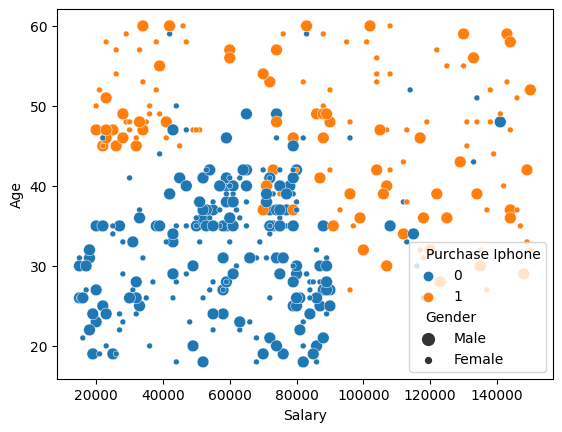

In [57]:
sns.scatterplot(x='Salary', y='Age',data=df, size='Gender', hue='Purchase Iphone')

In [58]:
gender_dict = {'Male':1, 'Female':1}
df = df.replace(gender_dict)

Looks Like datas are forming a clauster, we can apply KNN algorithm around the clauster

#Let's Split the dataset into train and test set

In [59]:
X = df.drop('Purchase Iphone', axis=1)
y = df['Purchase Iphone']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

We need to scale the data for better performance

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
scaler.fit(X_train, y_train)

StandardScaler()

In [65]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn_basic = KNeighborsClassifier(n_neighbors=1)

n_neighbors=1, here it a arbitary value of KNeighborsClassifier model,

We always try to choose a odd value so for a particular value we can classify the neighbor element

In [68]:
knn_basic.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
knn_basic_prediction = knn_basic.predict(scaled_X_test)

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [71]:
confusion_matrix(knn_basic_prediction, y_test)

array([[67,  6],
       [13, 34]], dtype=int64)

In [72]:
print(classification_report(knn_basic_prediction, y_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88        73
           1       0.85      0.72      0.78        47

    accuracy                           0.84       120
   macro avg       0.84      0.82      0.83       120
weighted avg       0.84      0.84      0.84       120



In the basic knn model we achieve 84% of accuracy, Now let's see the model behave on increasing the k-value

In [73]:
knn_test_score = []

In [74]:
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    y_pred = knn_model.predict(scaled_X_test)
    knn_test_score.append(1 - accuracy_score(y_pred,y_test))


Text(0, 0.5, 'Test Error Rate')

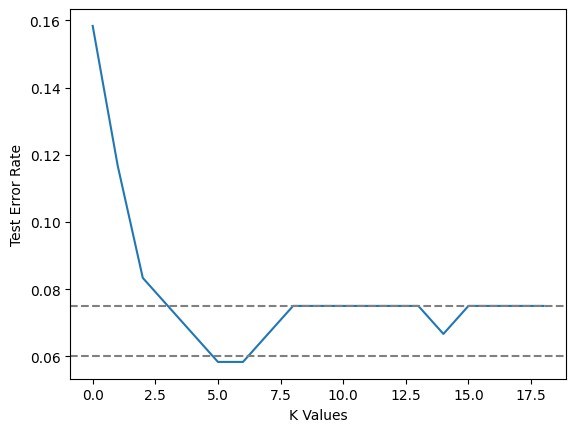

In [86]:
plt.plot(knn_test_score)
plt.axhline(y=0.075, color='grey', linestyle='--')
plt.axhline(y=0.06,color='grey', linestyle='--')
plt.xlabel('K Values')
plt.ylabel('Test Error Rate')


Look like the best optimize error lies in between those line 

From the graph we can say that the best performing k-value willbe around 14

Let's find the best performing k values for the model through GridSearchCv

In [87]:
scaler = StandardScaler()

In [88]:
knn = KNeighborsClassifier()

In [92]:
operations = [('scaler',scaler), ('knn', knn)]

Let's build a pipeline for the GridSearchCV

In [90]:
from sklearn.pipeline import Pipeline

In [93]:
pipe = Pipeline(steps=operations)

In [94]:
from sklearn.model_selection import GridSearchCV

In [96]:
k_values = list(range(1,20))

In [103]:
param_grid = {'knn__n_neighbors': k_values,
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']}

In [104]:
knn_cv_classifier = GridSearchCV(pipe, param_grid, cv=10, scoring='accuracy')

In [105]:
knn_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [106]:
knn_cv_classifier.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier())],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__knn': KNeighborsClassifier(),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__knn__algorithm': 'auto',
 'estimator__knn__leaf_size': 30,
 'estimator__knn__metric': 'minkowski',
 'estimator__knn__metric_params': None,
 'estimator__knn__n_jobs': None,
 'estimator__knn__n_neighbors': 5,
 'estimator__knn__p': 2,
 'estimator__knn__weights': 'uniform',
 'estimator': Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
 'n_jobs': None,
 'param_grid': {'knn__n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19],
  'knn__weights': ['uniform', 'distance'],
  'knn__metric': ['euclidean',

In [107]:
knn_cv_classifier.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}

Here, we got the best k-value for minimizing the error is 11

In [108]:
knn_cv_prediction = knn_cv_classifier.predict(X_test)

In [109]:
confusion_matrix(y_test, knn_cv_prediction)

array([[73,  7],
       [ 2, 38]], dtype=int64)

In [110]:
print(classification_report(y_test, knn_cv_prediction))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        80
           1       0.84      0.95      0.89        40

    accuracy                           0.93       120
   macro avg       0.91      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



On the upper Result we can see that our model accuracy impoved quite a bit from the basic one...